### **Code Description**:  
1. The code imports necessary libraries such as Pandas, NumPy, Matplotlib, Seaborn, and NLTK for data analysis, visualization, natural language processing, and machine learning.
2. It reads in a CSV file containing comments and their labels, drops unnecessary columns, and displays the distribution of toxic and non-toxic comments using a countplot.
3. It calculates and displays the length of comments and their distribution for toxic and non-toxic classes using a boxplot.
4. It preprocesses the comments by converting them to lowercase, removing HTML tags, links, digits, punctuation, escape characters, repeated characters, and short words, and lemmatizing the remaining words.
5. It generates word clouds for each toxic class of comments using the WordCloud library and displays them using Matplotlib.
6. It splits the preprocessed comments into training and testing sets, creates machine learning pipelines for Logistic Regression, Naive Bayes, Linear SVC, and Decision Tree classifiers using CountVectorizer and TF-IDF Vectorizer, and evaluates their performance using cross-validation and F1 score.

# **Navneeth S**







### **Importing necessary libraries:**

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from wordcloud import WordCloud, STOPWORDS
from operator import itemgetter
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\klaus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\klaus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\klaus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### **Loading the data**

In [12]:
data = pd.read_csv("data/train.csv") 
data = data.drop(['id'], axis=1)
data.head()

comment_text  toxic  severe_toxic  \
0  Explanation\nWhy the edits made under my usern...      0             0   
1  D'aww! He matches this background colour I'm s...      0             0   
2  Hey man, I'm really not trying to edit war. It...      0             0   
3  "\nMore\nI can't make any real suggestions on ...      0             0   
4  You, sir, are my hero. Any chance you remember...      0             0   

   obscene  threat  insult  identity_hate  
0        0       0       0              0  
1        0       0       0              0  
2        0       0       0              0  
3        0       0       0              0  
4        0       0       0              0

### **Exploratory Data Analysis**

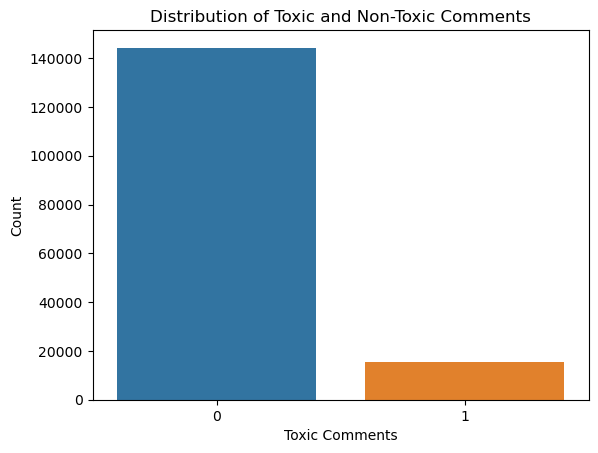

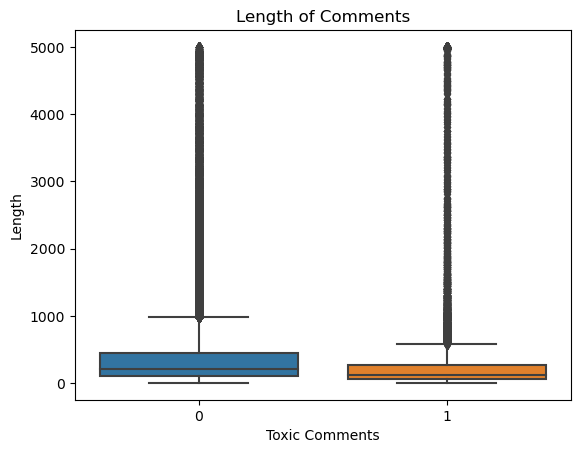

Dataset shape:  (159571, 8)

Class distribution:
 0    0.904156
1    0.095844
Name: toxic, dtype: float64

Sample comments:
0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


In [13]:
sns.countplot(x='toxic', data=data)
plt.title('Distribution of Toxic and Non-Toxic Comments')
plt.xlabel('Toxic Comments')
plt.ylabel('Count')
plt.show()

data['length'] = data['comment_text'].apply(len)
sns.boxplot(x='toxic', y='length', data=data)
plt.title('Length of Comments')
plt.xlabel('Toxic Comments')
plt.ylabel('Length')
plt.show()

print("Dataset shape: ", data.shape)
print("\nClass distribution:\n", data['toxic'].value_counts(normalize=True))
print("\nSample comments:")
print(data['comment_text'].head())

ValueError: We need at least 1 word to plot a word cloud, got 0.

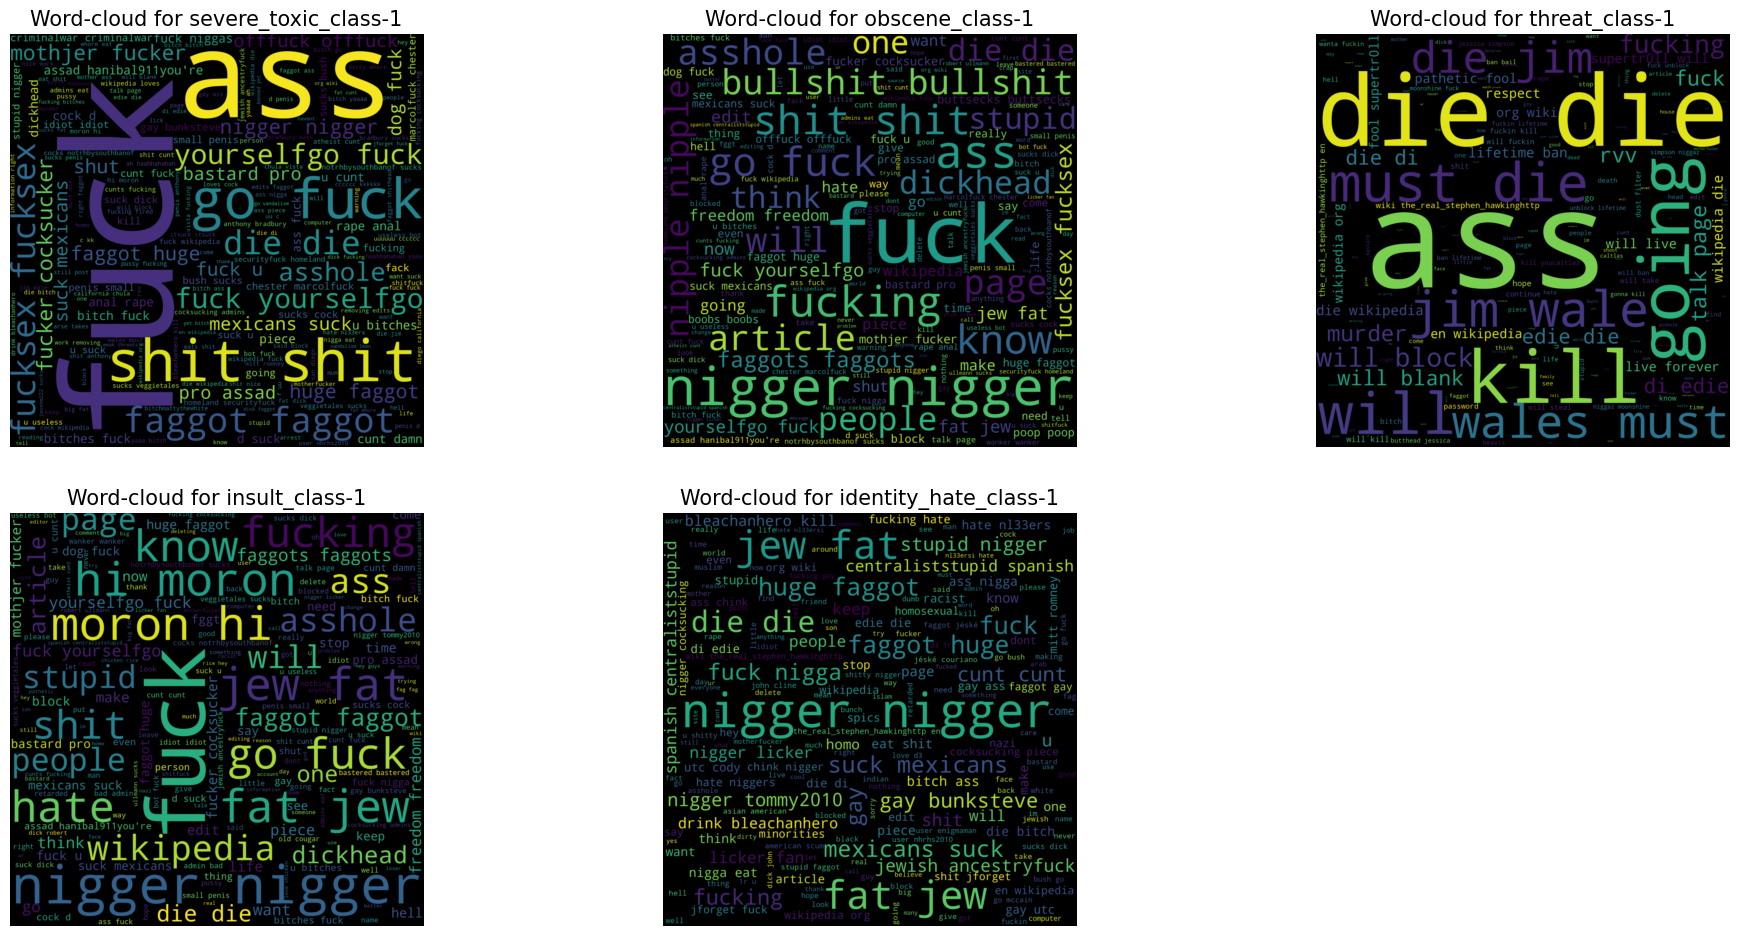

In [14]:
plt.figure(figsize=(20,10))
count=1
for col in data.columns[2:]:
    toxic_class_1 = data[data[col]==1]['comment_text'].str.lower().values
    wordcloud = WordCloud(width=2000, height=2000,
                          background_color ='black', margin=1,
                          stopwords = STOPWORDS,
                          ).generate(" ".join(toxic_class_1))

    plt.subplot(2,3,count)
    plt.axis("off")
    plt.title("Word-cloud for "+col+"_class-1",fontsize=15)
    plt.tight_layout(pad=3)
    plt.imshow(wordcloud,interpolation='bilinear')
    count=count+1
plt.show()

### **Preprocessing**

In [15]:
import re
import string
def convert_to_lower_case(text):
  """function to convert the input text to lower case"""
  return text.lower()

def remove_html_tags(text):
    """function to remove html tags (< >) and its content from the input text"""
    return re.sub(r"<.*>"," ",text, flags=re.MULTILINE)

def remove_links(text):
  """function to remove any kind of links with no html tags"""
  text= re.sub(r"http\S+"," ",text, flags=re.MULTILINE)
  return re.sub(r"www\S+"," ",text, flags=re.MULTILINE)

def remove_punctuation(text):
    """function to remove punctuation marks from the input text"""
    for i in string.punctuation:
        text = text.replace(i," ")
    return text

def remove_digits(text):
  """function to remove digits from the input text"""
  return re.sub(r'\d'," ",text, flags=re.MULTILINE)


def remove_escape_char(text):
    """function to remove newline (\n),tab(\t) and slashes (/ , \) from the input text"""
    return re.sub(r"[\n\t\\\/]"," ",text, flags=re.MULTILINE)

def remove_repeated_characters(text):
    """function to remove repeated characters if any from the input text"""
    """for example CAAAAASSSSSSEEEEE SSSSTTTTTUUUUUUDDDDYYYYYY gives CASE STUDY"""
    return re.sub(r"(\w)(\1{2,})","\\1",text,flags=re.MULTILINE)

def remove_words_lesth2(text):
    """function to remove words with length less than 2"""
    text = re.sub(r'\b\w{1,2}\b'," ",text)
    return text
    
stop_words = set(stopwords.words('english'))
final_stop_words=list(STOPWORDS.union(set(stop_words)))
final_stop_words.extend(["mr","mrs","miss","hi","hello","hey",
                         "one","two","three","four","five","six","seven","eight","nine","ten",
                         "us","also","dont","cant","any","can","along","among","during","anyone",
                         "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r",
                         "s","t","u","v","w","x","y","z",
                         "ok","okay","lol","rofl","hola","let","may","etc"])


In [16]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
def preprocess(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


In [17]:
data['comment_text'] = data['comment_text'].apply(preprocess)

### **Target feature imbalance**

In [18]:
toxic_comments = data[data['toxic']==1]
non_toxic_comments = data[data['toxic']==0].sample(n=len(toxic_comments), random_state=42)
balanced_data = pd.concat([toxic_comments, non_toxic_comments])

### **Splitting data into training and testing sets**

In [19]:
X = balanced_data['comment_text']
y = balanced_data['toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Vectorization and model training**

In [20]:
cv = CountVectorizer(ngram_range=(1,2), max_features=50000)
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Support Vector Machine', SVC()),
    ('Linear Support Vector Machine', LinearSVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
]

In [21]:
# Loop over the models and print the classification report for each
results = []
for name, model in models:
    print(f'Model: {name}\n')
    
    # Transform the training data using the CountVectorizer or TfidfVectorizer
    if 'Logistic Regression' in name:
        X_train_transformed = tfidf.fit_transform(X_train)
    else:
        X_train_transformed = cv.fit_transform(X_train)
        
    # Fit the model on the training data
    model.fit(X_train_transformed, y_train)
    
    # Transform the testing data using the CountVectorizer or TfidfVectorizer
    if 'Logistic Regression' in name:
        X_test_transformed = tfidf.transform(X_test)
    else:
        X_test_transformed = cv.transform(X_test)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test_transformed)
    
    # Print the classification report
    print(classification_report(y_test, y_pred))
    
    print('-' * 80)
    # Calculate the F1-score for the positive class
    f1 = f1_score(y_test, y_pred)
    
    # Append the results to the list
    results.append((name, f1))

# Sort the results by F1-score in descending order
sorted_results = sorted(results, key=itemgetter(1), reverse=True)

# Print the best model
print(f'The best model is {sorted_results[0][0]} with an F1-score of {sorted_results[0][1]:.2f}')
  

Model: Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2997
           1       0.92      0.87      0.89      3121

    accuracy                           0.89      6118
   macro avg       0.90      0.89      0.89      6118
weighted avg       0.90      0.89      0.89      6118

--------------------------------------------------------------------------------
Model: Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2997
           1       0.93      0.79      0.86      3121

    accuracy                           0.86      6118
   macro avg       0.87      0.87      0.86      6118
weighted avg       0.87      0.86      0.86      6118

--------------------------------------------------------------------------------
Model: Support Vector Machine

              precision    recall  f1-score   support

           0       0.87      0.76     

c:\notcdrive\allsoftinstallations\Anaconda\envs\heroda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2997
           1       0.90      0.87      0.88      3121

    accuracy                           0.88      6118
   macro avg       0.88      0.88      0.88      6118
weighted avg       0.88      0.88      0.88      6118

--------------------------------------------------------------------------------
Model: Decision Tree

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2997
           1       0.83      0.84      0.84      3121

    accuracy                           0.83      6118
   macro avg       0.83      0.83      0.83      6118
weighted avg       0.83      0.83      0.83      6118

--------------------------------------------------------------------------------
The best model is Logistic Regression with an F1-score of 0.89


### **Model Fitting**

In [22]:
pipeline = Pipeline([('tfidf', tfidf), ('model', LogisticRegression(random_state=42))])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Logistic Regression with TfidfVectorizer")
# Print the classification report
print(classification_report(y_test, y_pred))

print("F1-score: {:.2f}".format(f1_score(y_test, y_pred)))

Logistic Regression with TfidfVectorizer
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2997
           1       0.92      0.87      0.89      3121

    accuracy                           0.89      6118
   macro avg       0.90      0.89      0.89      6118
weighted avg       0.90      0.89      0.89      6118

F1-score: 0.89


### **Saving the best model**

In [23]:
import pickle

# Save the best model to disk
with open('models/best_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


### **Testing the model on a sample comment**

In [ ]:
sample_comment = "You fool"
sample_comment = preprocess(sample_comment)
y_pred = pipeline.predict([sample_comment])
if y_pred[0] == 1:
    print("The comment is toxic.")
else:
    print("The comment is not toxic.")
